<a href="https://colab.research.google.com/github/ViniciusNarcisoFernandes/Dieletric-Screening/blob/main/Dieletric_Screening_Numerov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Constantes**

In [ ]:
# Bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps
import scipy.optimize as opt
from scipy.integrate import quad

# Massa do elétron ([kg])
m_e = 9.10938*10**(-31)

# Carga elétrica ([C])
e = 1.602*10**(-19)

# hcortado
hbar = 6.582397003745317*10**(-16) # (eV.s)

# Permissividade do vácuo
eps0 = 1.4177699999999998*10**(-40) # (C^{2}/eV.A)

# Valor de a
a = 5.54

# Valor de alpha1 ([A]^2)
alp1 = 10.35

# Para x fixo (N) e Intervalo de integração (Nq):
N = 1000

# Valor de posição
xi = xf = 15

# X variando:
X = np.linspace(-xi,xf,N)

# Fator de correção
f = 16.02

# Raio de Bohr
a0 = 4*f*np.pi*eps0*np.power((hbar/e),2)/m_e
print(f'a0 = {a0} A')

# Constante na exp
l = 2/(a0)
print(f'l = {l:.5f} A^(-1)')


# Valor da energia
E = -4*np.power((l*hbar/1),2)/(2*m_e)
print(f'E = {E:.3f} eV')

a0 = 0.528971727199571 A
l = 3.78092 A^(-1)
E = -13.599 eV


In [ ]:
# Potencial W1D(x)
def W1D(N,xi,xf):
  # Listas:
  W11 = list()

  # Limpando a lista
  W11.clear()

  # Variação de x(fixo)
  for i in np.linspace(-xi,xf,N):
    x = i
    # Integral:
    W1 = quad(lambda q: (np.cos(q*x)*((2*sps.k0((a/2)*np.abs(q)))/(1+2*alp1*np.power(q,2)*sps.k0((a/2)*np.abs(q)))))/(2*np.pi), -np.inf,np.inf, limit = 3000,epsabs=1e-10,epsrel=1e-10)[0]
    # Adicionando na lista
    W11.append((W1*np.power(e,2))/(4*np.pi*eps0))
  return W11

# Função Potencial:
W1D = W1D(N,xi,xf)

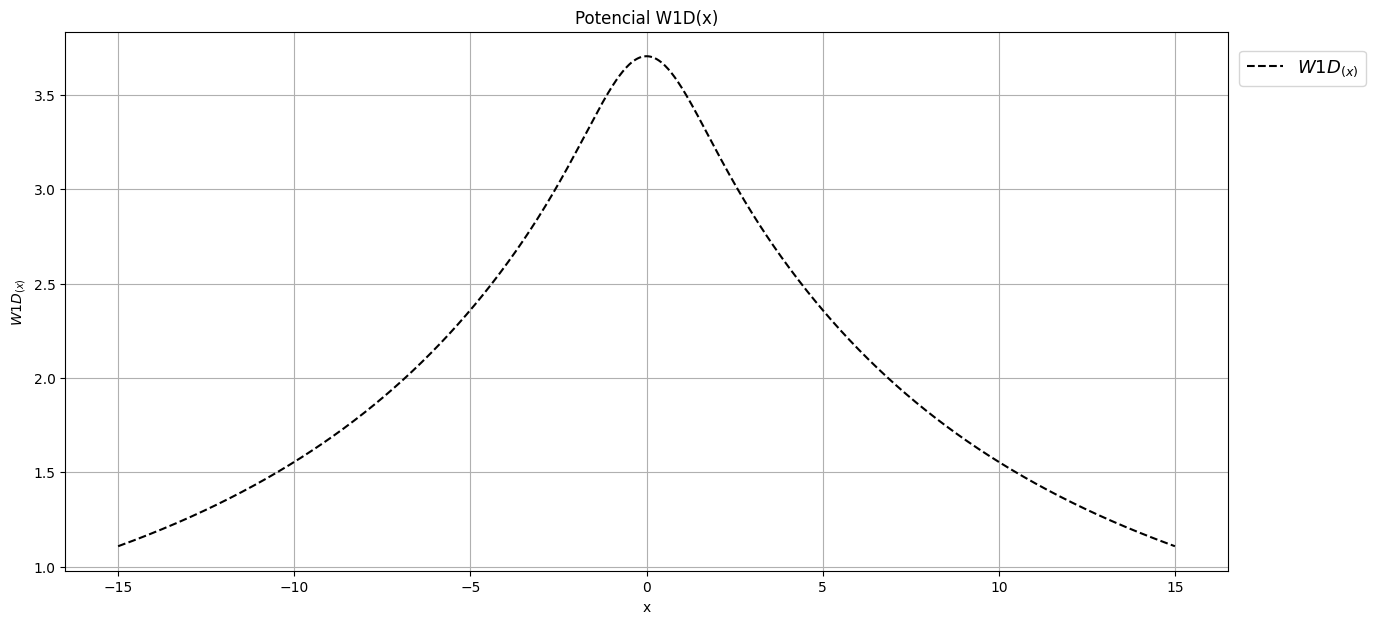

In [ ]:
# Plot
plt.figure(figsize=(15,7))
plt.plot(X,W1D,linestyle='--',color='black',label='$W1D_{(x)}$')
#plt.plot(X,1/(np.abs(X)),linestyle='--',color='orange',label ='1/X')
plt.title('Potencial W1D(x)')
plt.xlabel('x')
plt.ylabel('$W1D_{(x)}$')
plt.grid(True)
plt.legend(loc=(1.01,0.9),fontsize=13)
plt.show()

### **Numerov**

Solução: $x^{n}e^{-kx} + x^{n}e^{kx}$

In [ ]:
# Número quântico
n = 2

# Numerov left
def Numerov_left(E,W1D,n,l):

  # xl inicial:
  xl = -xi ; xmatch = 0

  # Substituição
  hl = (xmatch-xl)/N
  bl = np.power(hl,2)/12


  # Valor de k (Numerov)
  kl = np.zeros([N])
  kl[0] = (2*m_e*(E-W1D[0]))/(np.sqrt(f)*np.power(hbar,2))
  kl[1] = (2*m_e*(E-W1D[1]))/(np.sqrt(f)*np.power(hbar,2))

  # Vetor de psil
  psil = np.zeros([N])
  psil[0] = np.power(np.abs(xl),(n))*np.exp((l/(2*n))*(xl))
  psil[1] = np.power(np.abs(xl+hl),(n))*np.exp((l/(2*n))*(xl+hl))

  # Algoritmo de Numerov
  for i in range(1,N-1):
    kl[i+1] = (2*m_e*(E-W1D[i+1]))/(np.sqrt(f)*np.power(hbar,2))
    psil[i+1] = ((2*(1-(5*bl*kl[i]))*psil[i]) - ((1+(bl*kl[i-1]))*psil[i-1]))/(1+(bl*kl[i+1]))
  return psil,hl


In [ ]:
# Numerov right
def Numerov_right(E,W1D,n,l):

  # xr inicial
  xr = xf ; xmatch = 0

  # Substituição
  hr = (xr-xmatch)/N
  br = np.power(hr,2)/12

  # Valor de k (Numerov)
  kr = np.zeros([N])
  kr[0] = (2*m_e*(E-W1D[0]))/(np.sqrt(f)*np.power(hbar,2))
  kr[1] = (2*m_e*(E-W1D[1]))/(np.sqrt(f)*np.power(hbar,2))

  # Vetor psir
  psir = np.zeros([N])
  psir[0] = np.power((xr),(n))*np.exp(-(l/(2*n))*(xr))
  psir[1] = np.power((xr-hr),(n))*np.exp(-(l/(2*n))*(xr-hr))

  # Algoritmo de Numerov
  for j in range(1,N-1):
    kr[j+1] = (2*m_e*(E-W1D[j+1]))/(np.sqrt(f)*np.power(hbar,2))
    psir[j+1] = ((2*(1-5*br*kr[j])*psir[j]) - ((1+(br*kr[j-1]))*psir[j-1]))/(1+(br*kr[j+1]))
  return psir,hr


In [ ]:
# Energia
def Energy(N):
  # Listas
  R11,R22 = list(),list()

  # Energia
  for i in np.linspace(4,1.,N):
    E = i
    # Numerov left
    Numl,hl = Numerov_left(E,W1D,n,l)
    for i,j in enumerate(Numl):
      if (i == len(Numl)-1):
        l1 = j
      elif (i == len(Numl)-2):
        l2 = j
      elif (i == len(Numl)-3):
        l3 = j

    # Derivada left
    left = ((1/2*l3) - (2*l2) + (3/2*l1))/hl

    # Numerov right
    Numr,hr = Numerov_right(E,W1D,n,l)
    for i,j in enumerate(Numr):
      if (i == len(Numr)-1):
        r1 = j
      elif (i == len(Numr)-2):
        r2 = j
      elif(i == len(Numr)-3):
        r3 = j

    # Derivada right
    right = ((-1/2*r3) + (2*r2) - (3/2*r1))/hr

    # Fator de correção
    f1 = l1/r1

    # Diferença dos últimos pontos
    R1 = l1 - (r1)
    R11.append(R1)

    # Diferença nas derivadas
    R2 = left - (right)
    R22.append(R2)
  return R11,R22

# Função Numerov
Rr1,Rr2 = Energy(N)

In [ ]:
# Pontos
def pontos(E):
  # Numerov left
  Numl,hl = Numerov_left(E,W1D,n,l)
  for i,j in enumerate(Numl):
    if (i == len(Numl)-1):
      l1 = j
    elif (i == len(Numl)-2):
      l2 = j
    elif (i == len(Numl)-3):
      l3 = j

  # Derivada left
  left = ((1/2*l3) - (2*l2) + (3/2*l1))/hl

  # Numerov right
  Numr,hr = Numerov_right(E,W1D,n,l)
  for i,j in enumerate(Numr):
    if (i == len(Numr)-1):
      r1 = j
    elif (i == len(Numr)-2):
      r2 = j
    elif (i == len(Numr)-3):
      r3 = j

  # Derivada right
  right = ((-1/2*r3) + (2*r2) + (-3/2*r1))/hr

  # Fator de correção
  f1 = l1/r1

  # Diferença dos últimos pontos
  R1 = l1 - (r1)

  # Diferença das derivadas
  R2 = left - (right)

  # Soma das diferenças
  R3 = R2 + R1
  return R3

In [ ]:
# Valores de Rr1 e Rr2
print('Rr1 =',Rr1)
print('Rr2 =',Rr2)

Energia = [2.43799708]


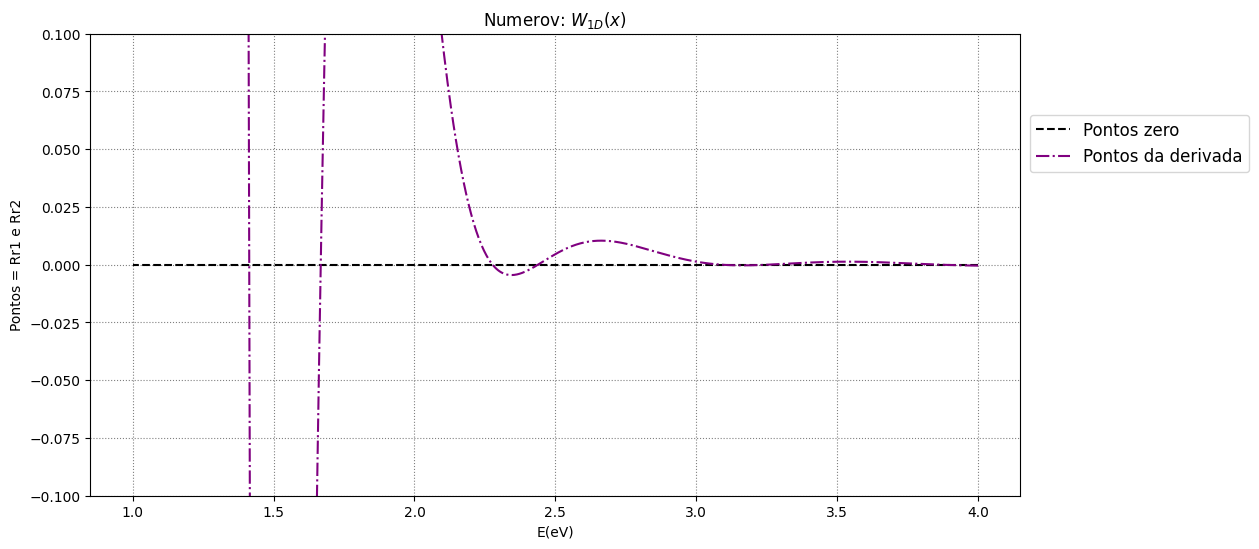

In [ ]:
# Energia
E = np.linspace(4,1.,N)

# Valor da energia
print('Energia =',opt.fsolve(pontos,2.5))

# Plot
plt.figure(figsize=(12,6))
plt.plot(E,Rr1,color='black',linestyle='--',label='Pontos zero')
plt.plot(E,Rr2,color='purple',linestyle='-.',label='Pontos da derivada')
plt.title(label='Numerov: $W_{1D}(x)$',loc='center')
plt.xlabel('E(eV)')
plt.ylabel('Pontos = Rr1 e Rr2')
plt.grid(color='gray',linestyle=':')
plt.legend(loc=(1.01,0.7),fontsize='12')
#plt.xlim([1,2])
plt.ylim([-0.1,0.1])
plt.show();

### **Funções de Onda**

In [ ]:
# Posição
xll = np.linspace(-xi,0,N)
xrr = np.linspace(xf,0,N)

# Energia
E2 = 2.43799708

# Função Numerov
Numl,hl = Numerov_left(E2,W1D,n,l)
Numr,hr = Numerov_right(E2,W1D,n,l)

# Plot
plt.figure(figsize =(15,6))
plt.plot(xll,Numl,color='Brown',linestyle='-')
plt.plot(xrr,Numr,color='Brown',linestyle='-')
plt.title('Função de onda do potencial')
plt.xlabel('$x(A)$')
plt.ylabel('$\psi(x)$')
plt.grid(True)
plt.show()

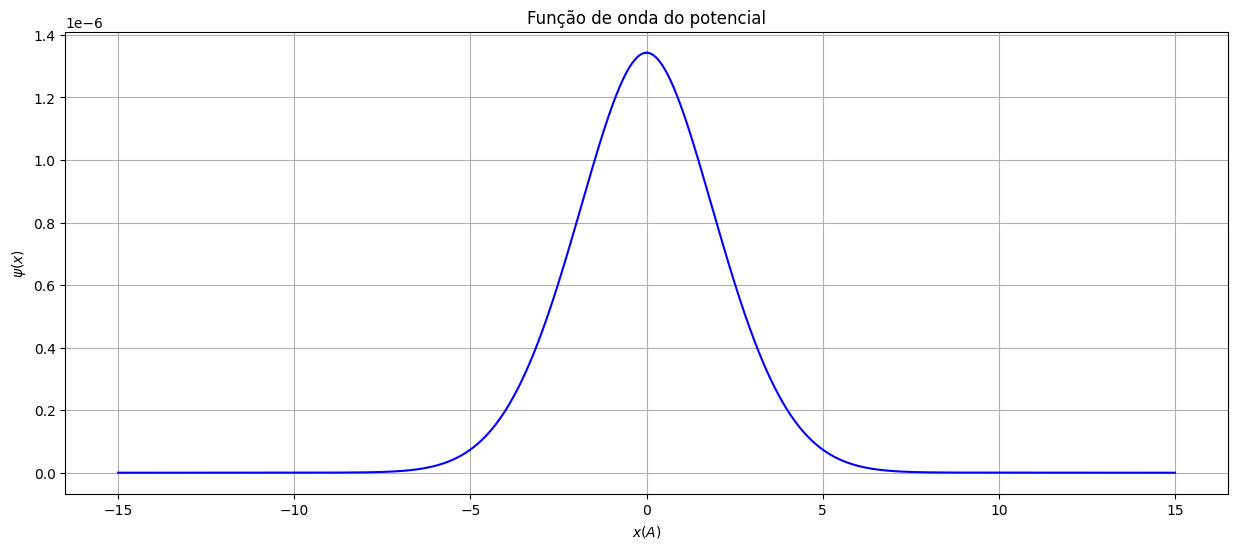

In [ ]:
# Posição
xll = np.linspace(-xi,0,N)
xrr = np.linspace(xf,0,N)

# Energia
E1 = 1.41349376

# Função Numerov
Numl,hl = Numerov_left(E1,W1D,n,l)
Numr,hr = Numerov_right(E1,W1D,n,l)

# Plot
plt.figure(figsize =(15,6))
plt.plot(xll,Numl,color='Blue',linestyle='-')
plt.plot(xrr,Numr,color='Blue',linestyle='-')
plt.title('Função de onda do potencial')
plt.xlabel('$x(A)$')
plt.ylabel('$\psi(x)$')
plt.grid(True)
plt.show()